In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import torch.nn as nn
import torch
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def rf(xs, y, n_estimators=200, max_samples=50,
       max_features=0.75, min_samples_leaf=10, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [ ]:
MSE = nn.MSELoss()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Company/Blood Labs/MIMIC Symile Analysis/train.csv')
df_percentiles = df.loc[:,df.columns.str.contains('percentile')]
df_raw = df.loc[:,~df.columns.str.contains('percentile')]
df_percentiles.index = df["subject_id"]
df_percentiles

,51221_percentile,51265_percentile,50912_percentile,50971_percentile,51222_percentile,51301_percentile,51249_percentile,51279_percentile,51250_percentile,51248_percentile,...,50821_percentile,50804_percentile,50818_percentile,52075_percentile,52073_percentile,52074_percentile,52069_percentile,51133_percentile,50910_percentile,52135_percentile
subject_id,,,,,,,,,,,,,,,,,,,,,
17628012,0.543258,0.221542,0.563640,0.677416,0.645913,0.793935,0.863098,0.499799,0.661008,0.820912,...,0.775259,0.740920,0.345366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11686629,0.433584,0.503313,0.705652,0.911493,0.476702,0.848263,0.675171,0.358578,0.754419,0.772298,...,0.663878,0.600484,0.745983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14798598,0.314286,0.277153,0.993586,0.856239,0.430006,0.359209,0.887204,0.393632,0.256328,0.519486,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.701479,NaN
12672152,0.390376,0.984441,0.805973,0.970163,0.240912,0.995280,0.021796,0.407895,0.482925,0.099337,...,0.688312,0.019591,0.304645,NaN,NaN,NaN,NaN,NaN,0.284334,NaN
18963838,0.270075,0.909857,0.668170,0.573538,0.227556,0.509942,0.159301,0.207915,0.829349,0.503013,...,NaN,NaN,NaN,0.618388,0.383304,0.022025,0.255773,0.162700,NaN,0.19906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14198739,0.186366,0.787994,0.939767,0.677416,0.215003,0.423278,0.546906,0.330153,0.090398,0.130876,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.044974,NaN
12906762,0.358897,0.730074,0.197234,0.900040,0.460534,0.726853,0.834371,0.455203,0.256328,0.437324,...,0.805635,0.357473,0.267885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18479770,0.778346,0.875627,0.401383,0.756982,0.720125,0.781281,0.335275,0.737244,0.544496,0.403777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
LABS = {
    "51221": "Hematocrit",
    "51265": "Platelet Count",
    "50912": "Creatinine",
    "50971": "Potassium",
    "51222": "Hemoglobin",
    "51301": "White Blood Cells",
    "51249": "MCHC",
    "51279": "Red Blood Cells",
    "51250": "MCV",
    "51248": "MCH",
    "51277": "RDW",
    "51006": "Urea Nitrogen",
    "50983": "Sodium",
    "50902": "Chloride",
    "50882": "Bicarbonate",
    "50868": "Anion Gap",
    "50931": "Glucose",
    "50960": "Magnesium",
    "50893": "Calcium, Total",
    "50970": "Phosphate",
    "51237": "INR(PT)",
    "51274": "PT",
    "51275": "PTT",
    "51146": "Basophils",
    "51256": "Neutrophils",
    "51254": "Monocytes",
    "51200": "Eosinophils",
    "51244": "Lymphocytes",
    "52172": "RDW-SD",
    "50934": "H",
    "51678": "L",
    "50947": "I",
    "50861": "Alanine Aminotransferase (ALT)",
    "50878": "Asparate Aminotransferase (AST)",
    "50813": "Lactate",
    "50863": "Alkaline Phosphatase",
    "50885": "Bilirubin, Total",
    "50820": "pH",
    "50862": "Albumin",
    "50802": "Base Excess",
    "50821": "pO2",
    "50804": "Calculated Total CO2",
    "50818": "pCO2",
    "52075": "Absolute Neutrophil Count",
    "52073": "Absolute Eosinophil Count",
    "52074": "Absolute Monocyte Count",
    "52069": "Absolute Basophil Count",
    "51133": "Absolute Lymphocyte Count",
    "50910": "Creatine Kinase (CK)",
    "52135": "Immature Granulocytes"
}

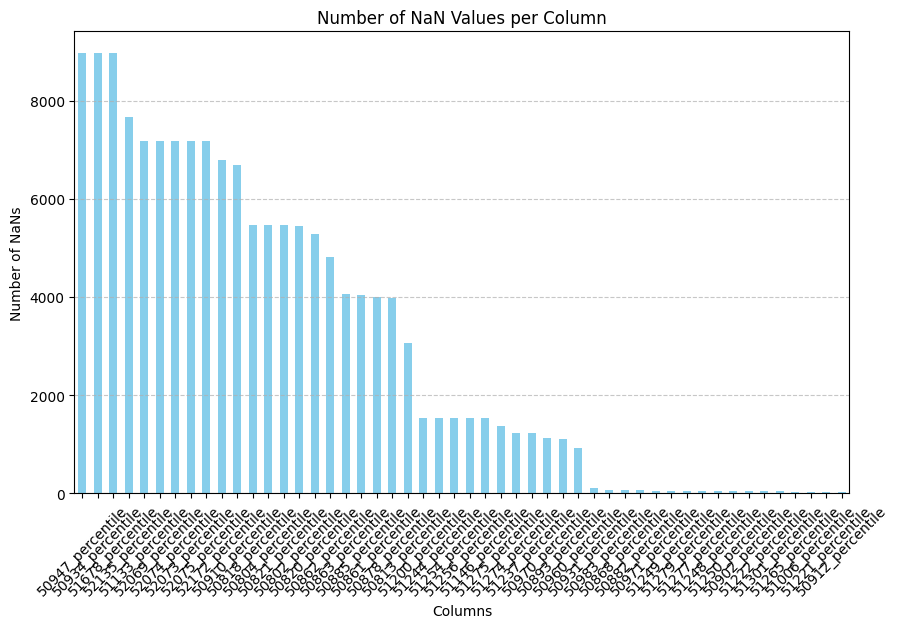

In [ ]:
nan_counts = df_percentiles.isna().sum()
nan_counts.sort_values(ascending=False, inplace = True)
# Plot the NaN counts
plt.figure(figsize=(10, 6))
nan_counts.plot(kind='bar', color='skyblue')
plt.title('Number of NaN Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of NaNs')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
least_common = nan_counts.head(9)
least_common = least_common.index.to_list()
least_common = [x.split("_")[0] for x in least_common]
least_common

['50947',
 '50934',
 '51678',
 '52135',
 '51133',
 '52069',
 '52074',
 '52073',
 '52075']

In [ ]:
least_common_names = []
for i in range(len(least_common)):
    least_common_names.append(LABS[least_common[i]])
least_common_names

['I',
 'H',
 'L',
 'Immature Granulocytes',
 'Absolute Lymphocyte Count',
 'Absolute Basophil Count',
 'Absolute Monocyte Count',
 'Absolute Eosinophil Count',
 'Absolute Neutrophil Count']

In [ ]:
drop = [x + "_percentile" for x in least_common]
df_common = df_percentiles.drop(drop, axis=1)
df_common

,51221_percentile,51265_percentile,50912_percentile,50971_percentile,51222_percentile,51301_percentile,51249_percentile,51279_percentile,51250_percentile,51248_percentile,...,50813_percentile,50863_percentile,50885_percentile,50820_percentile,50862_percentile,50802_percentile,50821_percentile,50804_percentile,50818_percentile,50910_percentile
subject_id,,,,,,,,,,,,,,,,,,,,,
17628012,0.543258,0.221542,0.563640,0.677416,0.645913,0.793935,0.863098,0.499799,0.661008,0.820912,...,0.380863,0.044254,0.750168,0.920958,NaN,0.891749,0.775259,0.740920,0.345366,NaN
11686629,0.433584,0.503313,0.705652,0.911493,0.476702,0.848263,0.675171,0.358578,0.754419,0.772298,...,0.164815,NaN,NaN,0.275270,NaN,0.469087,0.663878,0.600484,0.745983,NaN
14798598,0.314286,0.277153,0.993586,0.856239,0.430006,0.359209,0.887204,0.393632,0.256328,0.519486,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.701479
12672152,0.390376,0.984441,0.805973,0.970163,0.240912,0.995280,0.021796,0.407895,0.482925,0.099337,...,0.983403,0.804644,0.750168,0.029455,0.052804,0.018482,0.688312,0.019591,0.304645,0.284334
18963838,0.270075,0.909857,0.668170,0.573538,0.227556,0.509942,0.159301,0.207915,0.829349,0.503013,...,0.815991,0.958775,0.972520,NaN,0.323569,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14198739,0.186366,0.787994,0.939767,0.677416,0.215003,0.423278,0.546906,0.330153,0.090398,0.130876,...,0.043296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.044974
12906762,0.358897,0.730074,0.197234,0.900040,0.460534,0.726853,0.834371,0.455203,0.256328,0.437324,...,NaN,NaN,NaN,0.682772,NaN,0.469087,0.805635,0.357473,0.267885,NaN
18479770,0.778346,0.875627,0.401383,0.756982,0.720125,0.781281,0.335275,0.737244,0.544496,0.403777,...,0.897243,0.591116,0.595677,NaN,0.323569,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_complete = df_common.dropna()
df_complete.to_excel("/content/drive/MyDrive/Company/Blood Labs/MIMIC Symile Analysis/labs_complete.xlsx")

In [ ]:
colnames = df_complete.columns.to_list()

In [ ]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [ ]:
fi_df = pd.DataFrame(columns = df_complete.columns)
fi_df['loss'] = ""

In [ ]:
for col in colnames:

  y_df = df_complete.loc[:,col]
  x_df = df_complete.drop(col, axis=1)

  y = y_df.to_numpy()
  x = x_df.to_numpy()

  m = rf(x,y)

  y_preds = m.predict(x)

  loss = float(MSE(torch.tensor(y), torch.tensor(y_preds)))

  fi = rf_feat_importance(m, x_df)

  fi = fi.set_index('cols').T

  fi[col] = np.nan

  fi["loss"] = loss

  print(loss)

  order = fi_df.columns.to_list()

  fi = fi[order]

  col_name = col.split("_")[0]

  col_name = LABS[col_name]

  fi.index = [col_name]

  fi_df = pd.concat([fi_df, fi])

0.007288409793789157


<ipython-input-100-c1ab3d49db34>:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fi_df = pd.concat([fi_df, fi])


0.06562727433911857


<ipython-input-100-c1ab3d49db34>:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fi_df = pd.concat([fi_df, fi])


0.03219204585590836
0.0730206442918879
0.008173452664946778
0.059313577411512455
0.04488337386887265
0.01634644151254402
0.029680741483002752
0.024631735360681934
0.025204152816655542
0.035835869744192214
0.050809871870499526
0.04655462384963384
0.027447814094353207
0.04155794679823853
0.08460916421158421
0.07559496899785337
0.06882681033117896
0.0707080796016826
0.007075271280043633
0.009976080646423765
0.0652040217389356
0.043708853820701964
0.022581427723648916
0.06258814295643643
0.042425047869936124
0.0253496800172596
0.023134552710737607
0.03273593242730293
0.029078769950217766
0.056200326211397554
0.06702180373426293
0.05086102698419667
0.03421782725478065
0.04768865155155154
0.018175965892757027
0.06220701587606758
0.018106890487468944
0.038381496988716145
0.05785046039724998


In [ ]:
fi_df.columns = fi_df.columns.str.replace("_percentile", "")
fi_df.columns = fi_df.columns.map(LABS)

In [ ]:
fi_df

,Hematocrit,Platelet Count,Creatinine,Potassium,Hemoglobin,White Blood Cells,MCHC,Red Blood Cells,MCV,MCH,...,Alkaline Phosphatase,"Bilirubin, Total",pH,Albumin,Base Excess,pO2,Calculated Total CO2,pCO2,Creatine Kinase (CK),NaN
Hematocrit,NaN,0.000323,0.004375,0.000170,0.738354,0.000144,0.000000,0.234097,0.001161,0.000000,...,0.000000,0.000000,0.004725,0.001206,0.000000,0.000000,0.000000,0.000100,0.000420,0.007288
Platelet Count,0.004961,NaN,0.006605,0.025618,0.009292,0.212871,0.025528,0.034562,0.023773,0.069472,...,0.025562,0.039129,0.010559,0.018241,0.006907,0.024331,0.007405,0.009938,0.011653,0.065627
Creatinine,0.003708,0.006296,NaN,0.018497,0.011575,0.005916,0.008178,0.009955,0.002293,0.008390,...,0.006962,0.000051,0.008018,0.000230,0.002077,0.006787,0.003149,0.002117,0.002266,0.032192
Potassium,0.007813,0.018274,0.055336,NaN,0.005189,0.006581,0.071696,0.010495,0.005955,0.049135,...,0.027154,0.013021,0.038531,0.009202,0.003281,0.022230,0.004571,0.009176,0.019717,0.073021
Hemoglobin,0.778756,0.000000,0.002919,0.000397,NaN,0.000428,0.001063,0.188383,0.000000,0.002888,...,0.000085,0.000000,0.000000,0.001164,0.000000,0.002601,0.000000,0.000143,0.001238,0.008173
White Blood Cells,0.015361,0.178002,0.015620,0.011040,0.014443,NaN,0.004389,0.031196,0.002789,0.011171,...,0.011964,0.002284,0.022849,0.005925,0.020614,0.017656,0.005705,0.009455,0.037966,0.059314
MCHC,0.002620,0.008314,0.013719,0.024734,0.032783,0.006294,NaN,0.007214,0.007902,0.196549,...,0.007267,0.009585,0.054766,0.015667,0.001333,0.002995,0.005911,0.038570,0.003557,0.044883
Red Blood Cells,0.601701,0.004488,0.001950,0.000000,0.337252,0.000204,0.000447,NaN,0.007643,0.008484,...,0.000975,0.000000,0.000323,0.011546,0.000429,0.002248,0.000000,0.000119,0.000685,0.016346
MCV,0.002376,0.008501,0.000695,0.001797,0.002066,0.000382,0.027386,0.011385,NaN,0.733086,...,0.002137,0.001859,0.006483,0.003276,0.004670,0.002958,0.000236,0.010391,0.002334,0.029681
MCH,0.000000,0.005719,0.003287,0.011350,0.008379,0.002117,0.204092,0.005080,0.647700,NaN,...,0.001334,0.004231,0.000342,0.000000,0.000000,0.004980,0.005435,0.002933,0.002600,0.024632


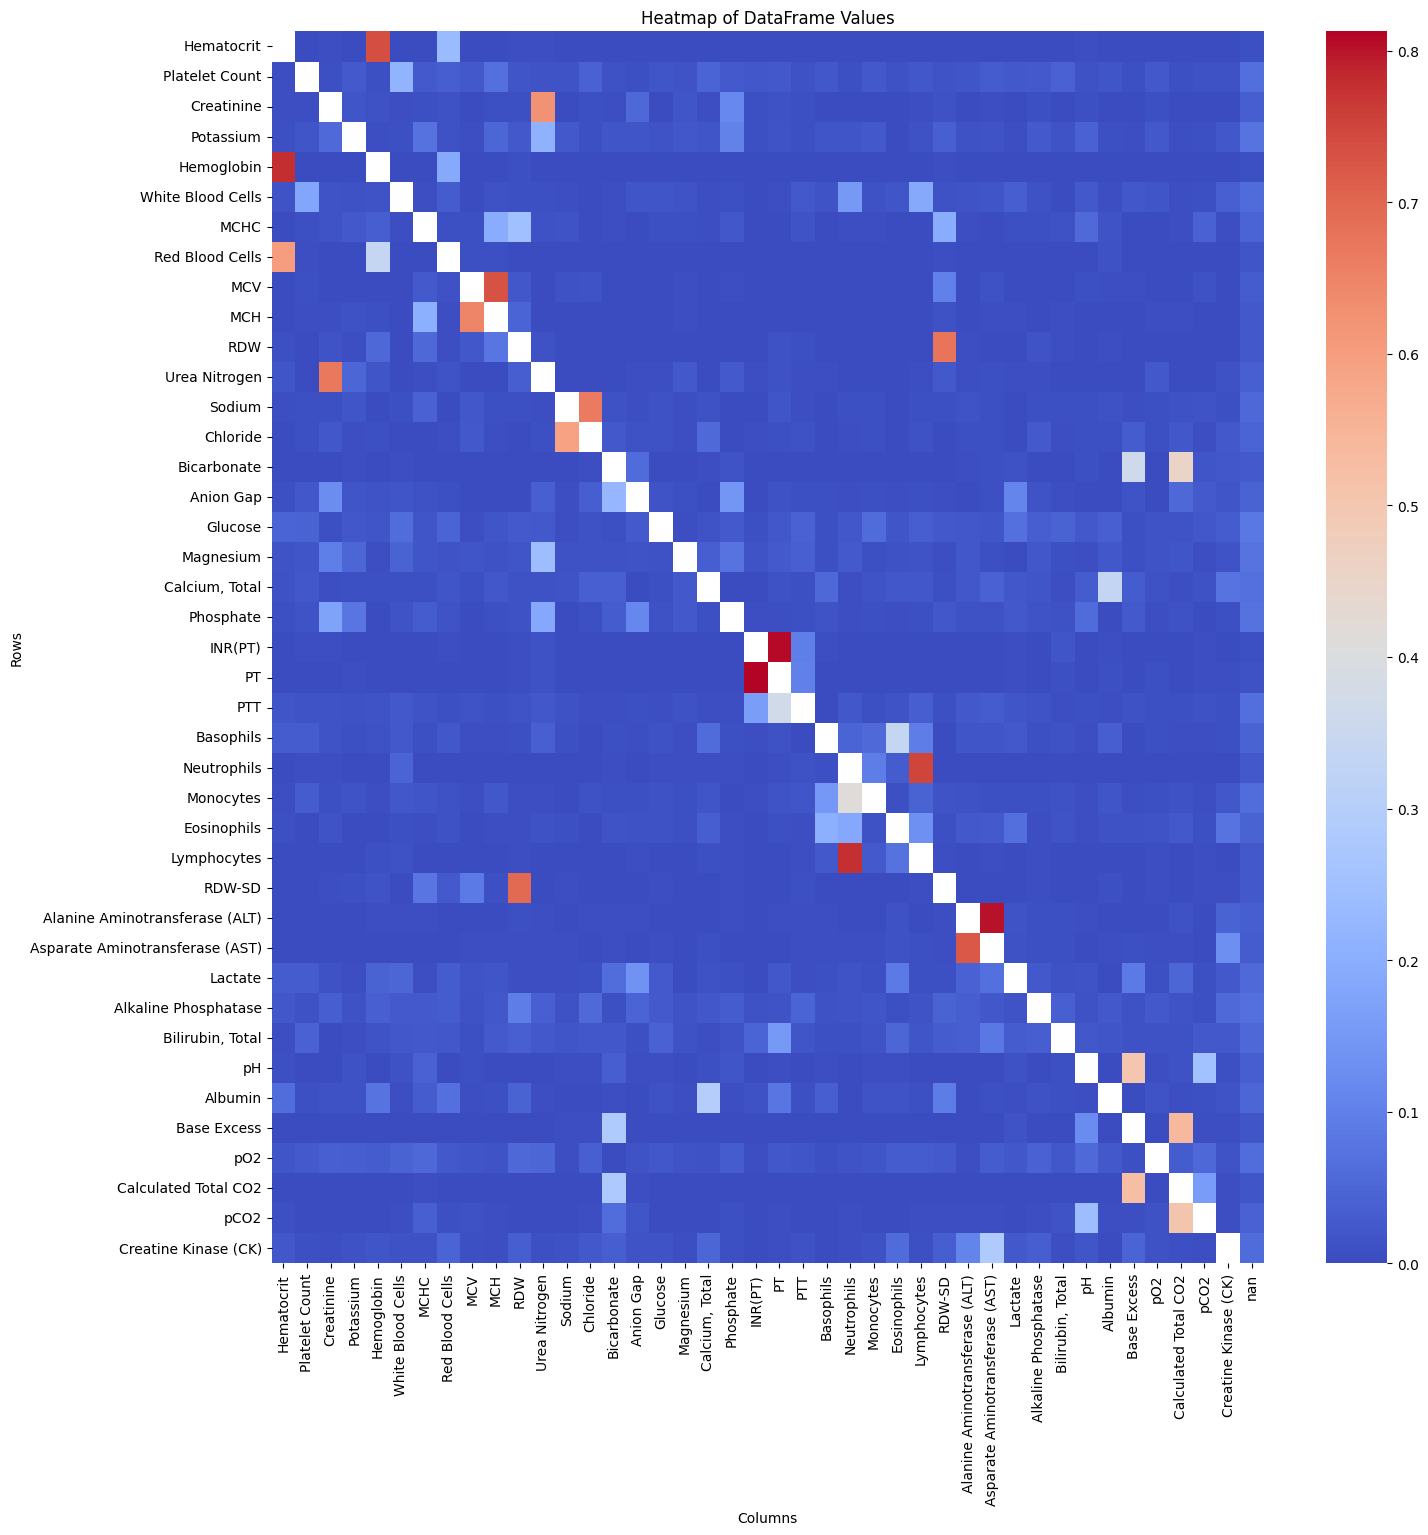

In [ ]:
# Create a heatmap using seaborn
plt.figure(figsize=(16, 16))  # Set the figure size
sns.heatmap(fi_df, cmap='coolwarm', fmt='g')  # `annot=True` displays values, `fmt='g'` formats values

# Add labels and title
plt.title('Heatmap of DataFrame Values')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Display the heatmap
plt.show()

In [ ]:
fi_df.to_csv('/content/drive/MyDrive/MIMIC/rf_feature_importance.csv')